In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import pandas as pd

import copy

In [2]:
df_orig = pd.read_csv('drifts.csv')
df_orig

,model,run,project,ocean model,OHC (J yr-1),barystatic OHC (J yr-1),thermal OHC (J yr-1),hfds (J yr-1),netTOA (J yr-1),wfo (kg yr-1),...,masso (g/kg yr-1),zosbary (m yr-1),zostoga (m yr-1),masso (m yr-1),ocean area (m2),masso vs soga regression,netTOA vs thermal OHC regression,wfo vs masso regression,wfo vs soga regression,hfds vs thermal OHC regression
0,ACCESS1-0,r1i1p1,cmip5,MOM,1.880000e+21,1.470000e+20,1.730000e+21,2.290000e+21,7.820000e+21,-1.307750e+14,...,-3.440000e-06,3.337500e-04,0.000178,3.539480e-04,NaN,NaN,NaN,NaN,NaN,NaN
1,ACCESS1-3,r1i1p1,cmip5,MOM,-2.420000e+21,-6.240000e+20,-1.800000e+21,-1.280000e+21,1.650000e+21,-7.408920e+14,...,1.460000e-05,-1.504552e-03,-0.000177,-1.505630e-03,3.613360e+14,NaN,NaN,NaN,NaN,NaN
2,BCC-CSM1-1,r1i1p1,cmip5,MOM,9.500000e+19,1.900000e+19,7.610000e+19,1.810000e+21,-1.240000e+22,NaN,...,-4.350000e-07,3.290000e-05,0.000016,3.250000e-05,5.075930e+14,NaN,NaN,NaN,NaN,NaN
3,CMCC-CESM,r1i1p1,cmip5,OPA,-2.200000e+20,0.000000e+00,-2.200000e+20,2.210000e+21,2.460000e+22,-8.718780e+11,...,0.000000e+00,-1.000000e-09,-0.000029,0.000000e+00,4.897640e+14,NaN,NaN,NaN,NaN,NaN
4,CMCC-CMS,r1i1p1,cmip5,OPA,2.660000e+20,2.889130e+15,2.660000e+20,3.470000e+21,1.270000e+22,-9.149130e+11,...,-6.770000e-11,5.430000e-10,0.000028,5.140000e-09,4.897640e+14,NaN,NaN,NaN,NaN,NaN
5,GFDL-ESM2G,r1i1p1,cmip5,GOLD,-2.000000e+20,-1.620000e+16,-2.000000e+20,-4.180000e+20,-1.780000e+21,-2.957520e+14,...,3.350000e-08,NaN,NaN,NaN,3.613740e+14,NaN,NaN,NaN,NaN,NaN
6,MIROC-ESM,r1i1p1,cmip5,COCO,8.920000e+21,-4.150000e+20,9.330000e+21,-6.600000e+23,-4.700000e+22,2.663070e+15,...,9.520000e-06,-1.010853e-03,0.000896,-9.932230e-04,3.641810e+14,NaN,NaN,NaN,NaN,NaN
7,MIROC-ESM-CHEM,r1i1p1,cmip5,COCO,1.020000e+22,-1.700000e+20,1.040000e+22,-6.580000e+23,-4.940000e+22,2.534180e+15,...,3.920000e-06,-4.415650e-04,0.001022,-4.083260e-04,3.641810e+14,NaN,NaN,NaN,NaN,NaN
8,MPI-ESM-MR,r1i1p1,cmip5,MPI-OM,3.430000e+20,1.160000e+20,2.280000e+20,2.360000e+21,8.380000e+21,2.724420e+14,...,-2.620000e-06,2.796690e-04,-0.000251,1.975720e-04,NaN,NaN,NaN,NaN,NaN,NaN
9,MPI-ESM-P,r1i1p1,cmip5,MPI-OM,2.750000e+20,1.160000e+20,1.590000e+20,7.240000e+20,8.550000e+21,5.679700e+14,...,-2.600000e-06,2.781790e-04,-0.000258,1.974930e-04,5.099480e+14,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df_orig.copy()
sec_in_year = 365.25 * 24 * 60 * 60
for header in list(df.columns.values)[4:]:
    df[header] = df[header] / sec_in_year
    new_header = header.replace('yr-1', 's-1')
    if 'J s-1' in new_header:
        new_header = new_header.replace('J s-1', 'PW')
        df[header] = df[header] / 1e15
    df.rename(columns={header: new_header}, inplace=True)

Fraction of OHC drift attributable to temperature (as opposed to mass) change:

In [4]:
df.insert(7, 'thermal OHC / OHC (%)', (df['thermal OHC (PW)'] / df['OHC (PW)'] ) * 100)

Fraction of total climate system energy leakage (i.e. netTOA - OHC) that happens outside of the ocean model: 

In [5]:
df.insert(10, 'atmos leakage / total system (%)', ((df['netTOA (PW)'] - df['hfds (PW)']) / (df['netTOA (PW)'] - df['thermal OHC (PW)'])) * 100)

In [6]:
df

,model,run,project,ocean model,OHC (PW),barystatic OHC (PW),thermal OHC (PW),thermal OHC / OHC (%),hfds (PW),netTOA (PW),...,masso (g/kg s-1),zosbary (m s-1),zostoga (m s-1),masso (m s-1),ocean area (m2),masso vs soga regression,netTOA vs thermal OHC regression,wfo vs masso regression,wfo vs soga regression,hfds vs thermal OHC regression
0,ACCESS1-0,r1i1p1,cmip5,MOM,0.059574,4.658149e-03,0.054820,92.021277,0.072566,0.247801,...,-1.090070e-13,1.057590e-11,5.636899e-12,1.121594e-11,NaN,NaN,NaN,NaN,NaN,NaN
1,ACCESS1-3,r1i1p1,cmip5,MOM,-0.076685,-1.977337e-02,-0.057039,74.380165,-0.040561,0.052285,...,4.626461e-13,-4.767638e-11,-5.617411e-12,-4.771054e-11,1.145005e+07,NaN,NaN,NaN,NaN,NaN
2,BCC-CSM1-1,r1i1p1,cmip5,MOM,0.003010,6.020737e-04,0.002411,80.105263,0.057355,-0.392932,...,-1.378432e-14,1.042538e-12,5.038406e-13,1.029863e-12,1.608465e+07,NaN,NaN,NaN,NaN,NaN
3,CMCC-CESM,r1i1p1,cmip5,OPA,-0.006971,0.000000e+00,-0.006971,100.000000,0.070031,0.779527,...,0.000000e+00,-3.168809e-17,-9.316298e-13,0.000000e+00,1.551968e+07,NaN,NaN,NaN,NaN,NaN
4,CMCC-CMS,r1i1p1,cmip5,OPA,0.008429,9.155101e-08,0.008429,100.000000,0.109958,0.402439,...,-2.145284e-18,1.720663e-17,8.809288e-13,1.628768e-16,1.551968e+07,NaN,NaN,NaN,NaN,NaN
5,GFDL-ESM2G,r1i1p1,cmip5,GOLD,-0.006338,-5.133470e-07,-0.006338,100.000000,-0.013246,-0.056405,...,1.061551e-15,NaN,NaN,NaN,1.145125e+07,NaN,NaN,NaN,NaN,NaN
6,MIROC-ESM,r1i1p1,cmip5,COCO,0.282658,-1.315056e-02,0.295650,104.596413,-20.914138,-1.489340,...,3.016706e-13,-3.203200e-11,2.840663e-11,-3.147334e-11,1.154020e+07,NaN,NaN,NaN,NaN,NaN
7,MIROC-ESM-CHEM,r1i1p1,cmip5,COCO,0.323218,-5.386975e-03,0.329556,101.960784,-20.850762,-1.565392,...,1.242173e-13,-1.399235e-11,3.238954e-11,-1.293907e-11,1.154020e+07,NaN,NaN,NaN,NaN,NaN
8,MPI-ESM-MR,r1i1p1,cmip5,MPI-OM,0.010869,3.675818e-03,0.007225,66.472303,0.074784,0.265546,...,-8.302279e-14,8.862176e-12,-7.965656e-12,6.260679e-12,NaN,NaN,NaN,NaN,NaN,NaN
9,MPI-ESM-P,r1i1p1,cmip5,MPI-OM,0.008714,3.675818e-03,0.005038,57.818182,0.022942,0.270933,...,-8.238903e-14,8.814961e-12,-8.177206e-12,6.258176e-12,1.615928e+07,NaN,NaN,NaN,NaN,NaN


In [7]:
def plot_abline(ax, slope, intercept):
    """Plot a line from slope and intercept"""

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, linestyle='--', c='0.5')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

def plot_shading(ax):
    """Plot shading to indicate dominant source of drift."""
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_vals = np.array(xlim)
    y_vals = x_vals * 2
    ax.fill_between(x_vals, 0, y_vals, alpha=0.3, color='0.5')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    
def plot_eei_shading(ax):
    """Plot shading to indicate netTOA / OHC valid range."""
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_vals = np.array(xlim)
    y_vals = x_vals * 0.8
    ax.fill_between(x_vals, x_vals, y_vals, alpha=0.3, color='0.5')
                      
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
                      
def format_axis_label(orig_label, scale_factor):
    """Put LaTeX math into axis labels"""
    
    label = orig_label.replace('(', '($').replace(')', '$)').replace('s-1', '\; s^{-1}')
    if scale_factor:
        scale_factor = int(scale_factor) * -1
        label = label.replace('($', '($10^{%s} \;' %(str(scale_factor)))
    
    return label 

In [8]:
zoom_limits = {'thermal energy conservation': [-0.15, 0.15],
               'mass conservation': [-2e7, 2e7],
               'salt conservation': [-7e-13, 7e-13],
               'barystatic consistency': [-1e-12, 1e-12],
               'planetary energy imbalance': [-0.15, 0.15]}

ocean_model_colors = {'MOM': 'red',
                      'GOLD': 'gold',
                      'NEMO': 'blue',
                      'OPA': 'green',
                      'COCO': 'chocolate',
                      'MPI-OM': 'purple',
                      'MICOM-HAMOCC': 'teal',
                      'POP': 'lime'}

markers = ['o', '<', '^', '>', 'v', 's', 'p', 'D',
           'o', '<', '^', '>', 'v', 's', 'p', 'D']

def plot_aesthetics(ax, yvar, xvar, scinotation, shading, scale_factor):
    """Set the plot aesthetics"""
    
    if shading:
        plot_shading(ax)
    if xvar == 'netTOA (PW)':
        plot_eei_shading(ax)
    else:
        plot_abline(ax, 1, 0)
    ax.axhline(y=0, color='black', linewidth=1.0)
    ax.axvline(x=0, color='black', linewidth=1.0)
    #ax.yaxis.major.formatter._useMathText = True
    #ax.xaxis.major.formatter._useMathText = True

    ylabel = format_axis_label(yvar, scale_factor)
    ax.set_ylabel(ylabel)
    xlabel = format_axis_label(xvar, scale_factor)
    ax.set_xlabel(xlabel)
    plt.sca(ax)
    if scinotation:
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
    
    # Shrink current axis by 20%
   #box = ax.get_position()
   #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])


def plot_comparison(df, title, xvar, yvar, scale_factor=0,
                    scinotation=False, shading=False, zoom=None):
    """Plot comparison for given x and y variables.
    
    Data are multiplied by 10^scale_factor.
    
    """
    
    if zoom:
        fig = plt.figure(figsize=[14, 5])
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)
    else:
        fig = plt.figure(figsize=[7, 5])
        ax1 = fig.add_subplot(1, 1, 1)
    
    #colormap = cm.gist_rainbow
    #colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(df['model']))]

    for dotnum in range(len(df['model'])):
        x = df[xvar][dotnum] * 10**scale_factor
        y = df[yvar][dotnum] * 10**scale_factor
        marker = markers[dotnum]
        label = df['model'][dotnum] + ' (' + df['run'][dotnum] + ')'
        ocean_model = df['ocean model'][dotnum]
        color = ocean_model_colors[ocean_model]
        if df['project'][dotnum] == 'cmip6':
            facecolors = color
            edgecolors ='black'
        else:
            facecolors = 'none'
            edgecolors = color
        ax1.scatter(x, y, label=label, s=130, linewidth=1.2, marker=marker, facecolors=facecolors, edgecolors=edgecolors)
        if zoom:
            ax2.scatter(x, y, label=label, s=130, linewidth=1.2, marker=marker, facecolors=facecolors, edgecolors=edgecolors)

    plot_aesthetics(ax1, yvar, xvar, scinotation, shading, scale_factor)
    if zoom:
        ax2.set_xlim(zoom)
        ax2.set_ylim(zoom)
        plot_aesthetics(ax2, yvar, xvar, scinotation, shading, scale_factor)
        ax1.set_title('all models')
        ax2.set_title('zoomed in')
        plt.suptitle(title)
        ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        plt.title(title)
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

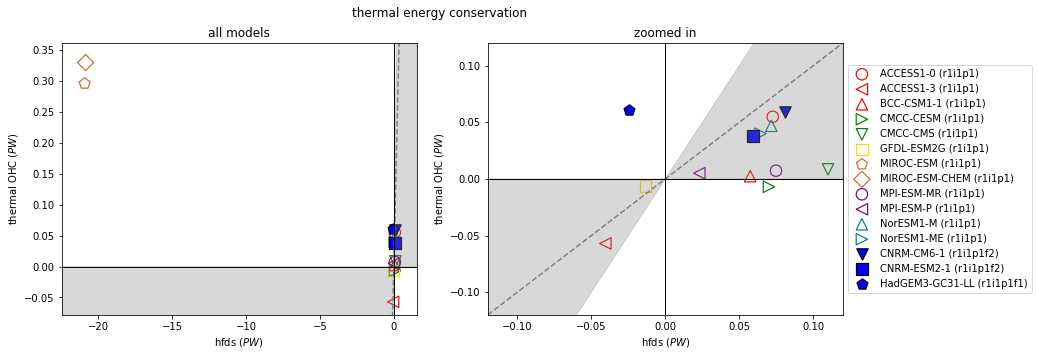

In [9]:
plot_comparison(df, 'thermal energy conservation', 'hfds (PW)', 'thermal OHC (PW)', shading=True, zoom=[-0.12, 0.12])

Below the 1:1 line indicates that the ocean model is losing heat.

Within the shaded area means the drift in surface forcing is greater than the internally generated ocean model drift.

Better units might be $W \; m^{-2}$?

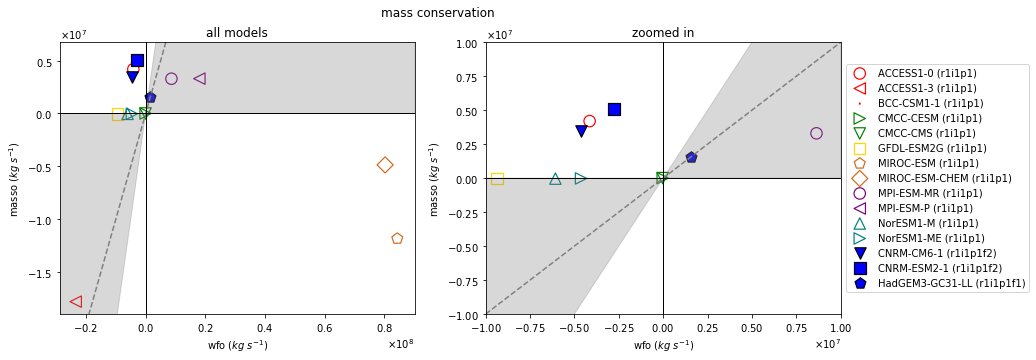

In [10]:
plot_comparison(df, 'mass conservation', 'wfo (kg s-1)', 'masso (kg s-1)', scinotation=True, shading=True, zoom=[-1e7, 1e7])

Below the 1:1 line indicates that the ocean model is losing mass.

Within the shaded area means the drift in surface forcing is greater than the internally generated ocean model drift.

Better units might be mm / year (i.e. an equivalent change in global sea level or Gt/year (to compare with Antarctic and/or Greenland melt rates). 

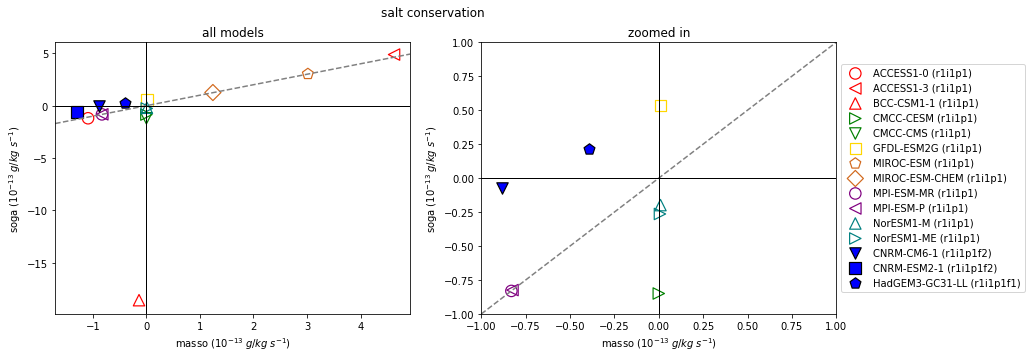

In [11]:
plot_comparison(df, 'salt conservation', 'masso (g/kg s-1)', 'soga (g/kg s-1)', scale_factor=13, zoom=[-1, 1])

Below the 1:1 line indicates that the ocean model is losing salt.

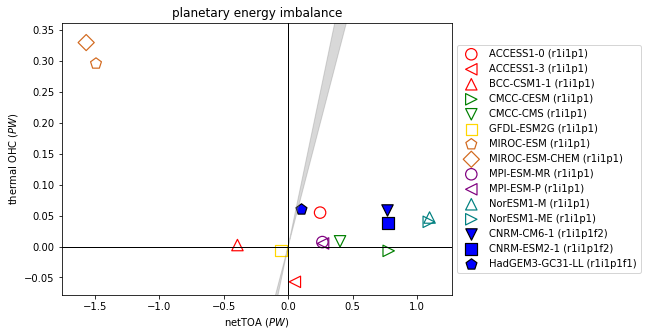

In [12]:
plot_comparison(df, 'planetary energy imbalance', 'netTOA (PW)', 'thermal OHC (PW)')

Grey shading shows the region where $\delta H / \delta t$ = 80-100% of netTOA.

Better units might be $W \; m^{-2}$?

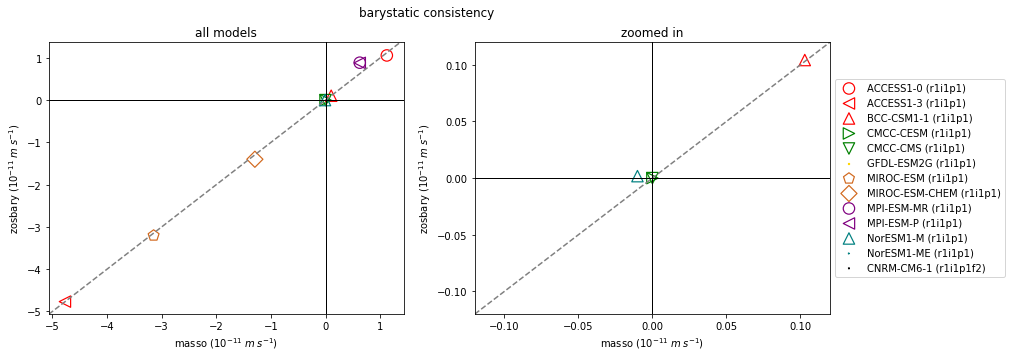

In [27]:
plot_comparison(df, 'barystatic consistency', 'masso (m s-1)', 'zosbary (m s-1)', scale_factor=11, zoom=[-0.12, 0.12])

TODO (*italics maybe*, solid definitely)

- H and M timeseries (decadal mean, with and without linear trend removed)
- Putting the drift in context:
  - Versus observations: EEI ($W \; m^{-2}$), sea level rise (mm / year), Antarctic/Greenland melt rates (Gt / year)  
  - Versus forced experiments: historical, SSPs, 1pctCO2
- *Scatter: steric components from CMIP5 models that don't report Boussinesq mass?*
- Correlations (do regression coefficient like Will instead - requires correct phase and amplitude)
  - *Might also be worth looking at whether dedrifted forced changes are consistent between key variables (i.e. their natural variability might be out of sync but not their forced changes?)*
- *TCR*
- *pattern amplification*